In [69]:
import pandas as pd

#Gathering Data

# Load dataset dari folder lokal
df_day = pd.read_csv('Bike-sharing-dataset/day.csv')
df_hour = pd.read_csv('Bike-sharing-dataset/hour.csv')

# Cek 5 data pertama
print(df_day.head())
print(df_hour.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

In [134]:
#Assessing Data

# Cek informasi umum
print(df_day.info())
print(df_hour.info())

# Cek jumlah data duplikat
print(f"Duplikasi di day.csv: {df_day.duplicated().sum()}")
print(f"Duplikasi di hour.csv: {df_hour.duplicated().sum()}")

# Cek jumlah missing value
print(f"Missing values di day.csv:\n{df_day.isnull().sum()}")
print(f"Missing values di hour.csv:\n{df_hour.isnull().sum()}")

# Fungsi untuk mendeteksi outlier dengan IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Cek outlier untuk jumlah penyewa (cnt)
outliers_cnt = detect_outliers_iqr(df_day, "cnt")
print(f"Jumlah outlier di 'cnt': {len(outliers_cnt)}")

# Cek outlier untuk variabel lain
outliers_temp = detect_outliers_iqr(df_day, "temp")
outliers_hum = detect_outliers_iqr(df_day, "hum")
outliers_windspeed = detect_outliers_iqr(df_day, "windspeed")

print(f"Jumlah outlier di 'temp': {len(outliers_temp)}")
print(f"Jumlah outlier di 'hum': {len(outliers_hum)}")
print(f"Jumlah outlier di 'windspeed': {len(outliers_windspeed)}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int32         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
 16  month       731 non-null  

In [42]:
#Cleaning Data

#Tidak ada duplikat
#Tidak ada missing values

#Konversi tipe data
# Konversi dteday ke datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# Ubah kolom kategorikal
categorical_cols_day = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
categorical_cols_hour = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in categorical_cols_day:
    df_day[col] = df_day[col].astype('category')

for col in categorical_cols_hour:
    df_hour[col] = df_hour[col].astype('category')

In [141]:
# Menampilkan Baris yang Mengandung Outlier

# Menentukan batas outlier menggunakan IQR
Q1_hum = df_day['hum'].quantile(0.25)
Q3_hum = df_day['hum'].quantile(0.75)
IQR_hum = Q3_hum - Q1_hum
lower_bound_hum = Q1_hum - 1.5 * IQR_hum
upper_bound_hum = Q3_hum + 1.5 * IQR_hum

Q1_windspeed = df_day['windspeed'].quantile(0.25)
Q3_windspeed = df_day['windspeed'].quantile(0.75)
IQR_windspeed = Q3_windspeed - Q1_windspeed
lower_bound_windspeed = Q1_windspeed - 1.5 * IQR_windspeed
upper_bound_windspeed = Q3_windspeed + 1.5 * IQR_windspeed

# Filter outlier
outlier_hum = df_day[(df_day['hum'] < lower_bound_hum) | (df_day['hum'] > upper_bound_hum)]
outlier_windspeed = df_day[(df_day['windspeed'] < lower_bound_windspeed) | (df_day['windspeed'] > upper_bound_windspeed)]

# Menampilkan hasil
print("Outlier pada Humidity (hum):")
display(outlier_hum)

print("\nOutlier pada Windspeed:")
display(outlier_windspeed)

# (hum dan windspeed masih dalam rentang wajar, jadi tidak perlu dihapus atau dirubah)

Outlier pada Humidity (hum):


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month,year
49,50,2011-02-19,1,0,2,0,5,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635,2,2011
68,69,2011-03-10,1,0,3,0,3,1,3,0.389091,0.385668,0.000000,0.261877,46,577,623,3,2011



Outlier pada Windspeed:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month,year
44,45,2011-02-14,1,0,2,0,0,1,1,0.415000,0.398350,0.375833,0.417908,208,1705,1913,2,2011
49,50,2011-02-19,1,0,2,0,5,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635,2,2011
93,94,2011-04-04,2,0,4,0,0,1,1,0.573333,0.542929,0.426250,0.385571,734,2381,3115,4,2011
94,95,2011-04-05,2,0,4,0,1,1,2,0.414167,0.398350,0.642083,0.388067,167,1628,1795,4,2011
292,293,2011-10-20,4,0,10,0,3,1,1,0.475833,0.466525,0.636250,0.422275,471,3724,4195,10,2011
382,383,2012-01-18,1,1,1,0,2,1,1,0.303333,0.275254,0.443333,0.415429,109,3267,3376,1,2012
407,408,2012-02-12,1,1,2,0,6,0,1,0.127500,0.101658,0.464583,0.409212,73,1456,1529,2,2012
420,421,2012-02-25,1,1,2,0,5,0,1,0.290833,0.255675,0.395833,0.421642,317,2415,2732,2,2012
432,433,2012-03-08,1,1,3,0,3,1,1,0.527500,0.524604,0.567500,0.441563,486,4896,5382,3,2012
433,434,2012-03-09,1,1,3,0,4,1,2,0.410833,0.397083,0.407083,0.414800,447,4122,4569,3,2012


In [44]:
#Validasi Data Setelah Cleaning

# Cek ulang informasi dataset
print(df_day.info())
print(df_hour.info())

# Cek apakah masih ada duplikasi atau missing values
print(f"Duplikasi di day.csv: {df_day.duplicated().sum()}")
print(f"Duplikasi di hour.csv: {df_hour.duplicated().sum()}")
print(f"Missing values di day.csv:\n{df_day.isnull().sum()}")
print(f"Missing values di hour.csv:\n{df_hour.isnull().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

In [77]:
#EDA

# Memeriksa statistik deskriptif
# Statistik deskriptif untuk df_day
print("\nStatistik Deskriptif Dataset Harian:")
print(df_day.describe())

# Statistik deskriptif untuk df_hour
print("\nStatistik Deskriptif Dataset Per Jam:")
print(df_hour.describe())


Statistik Deskriptif Dataset Harian:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0

In [113]:
# EDA

# Melihat Distribusi Penyewaan Sepeda Berdasarkan Tahun & Bulan
df_day.groupby(["yr", "mnth"]).agg({
    "cnt": ["sum", "mean", "median"]
})

cnt                     
            sum         mean  median
yr mnth                             
0  1      38189  1231.903226  1248.0
   2      48215  1721.964286  1629.0
   3      64045  2065.967742  2077.0
   4      94870  3162.333333  3226.5
   5     135821  4381.322581  4451.0
   6     143512  4783.733333  4839.5
   7     141341  4559.387097  4541.0
   8     136691  4409.387097  4602.0
   9     127418  4247.266667  4584.5
   10    123511  3984.225806  4304.0
   11    102167  3405.566667  3631.0
   12     87323  2816.870968  3068.0
1  1      96744  3120.774194  3243.0
   2     103137  3556.448276  3777.0
   3     164875  5318.548387  5382.0
   4     174224  5807.466667  6214.5
   5     195865  6318.225806  6421.0
   6     202830  6761.000000  6988.0
   7     203607  6567.967742  6685.0
   8     214503  6919.451613  7148.0
   9     218573  7285.766667  7514.5
   10    198841  6414.225806  7282.0
   11    152664  5088.800000  5319.0
   12    123713  3990.741935  4649.0

In [115]:
# Pengaruh Musim terhadap Penyewaan Sepeda
df_day.groupby("season").agg({
    "cnt": ["sum", "mean", "median"]
})

cnt                     
            sum         mean  median
season                              
1        471348  2604.132597  2209.0
2        918589  4992.331522  4941.5
3       1061129  5644.303191  5353.5
4        841613  4728.162921  4634.5

In [119]:
# Pengaruh Cuaca terhadap Penyewaan Sepeda
df_day.groupby("weathersit").agg({
    "cnt": ["sum", "mean", "median"]
})

cnt                     
                sum         mean  median
weathersit                              
1           2257952  4876.786177  4844.0
2            996858  4035.862348  4040.0
3             37869  1803.285714  1817.0

In [121]:
# Tren Penyewaan Sepeda Berdasarkan Hari dalam Seminggu

df_day.groupby("weekday").agg({
    "cnt": ["sum", "mean", "median"]
})


cnt                     
            sum         mean  median
weekday                             
0        455503  4338.123810  4359.0
1        469109  4510.663462  4576.5
2        473048  4548.538462  4642.5
3        485395  4667.259615  4721.0
4        487790  4690.288462  4601.5
5        477807  4550.542857  4521.0
6        444027  4228.828571  4334.0

In [123]:
# Hubungan Antara Hari Libur & Penyewaan
df_day.groupby("holiday").agg({
    "cnt": ["sum", "mean", "median"]
})

cnt                     
             sum         mean  median
holiday                              
0        3214244  4527.104225  4558.0
1          78435  3735.000000  3351.0

In [125]:
# Hubungan Suhu, Kelembaban, dan Kecepatan Angin terhadap Penyewaan

df_day[["temp", "hum", "windspeed", "cnt"]].corr()

,temp,hum,windspeed,cnt
temp,1.000000,0.126963,-0.157944,0.627494
hum,0.126963,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.248489,1.000000,-0.234545
cnt,0.627494,-0.100659,-0.234545,1.000000


In [127]:
# Pola Penyewaan Berdasarkan Jenis Pengguna

df_day[["casual", "registered", "cnt"]].describe()
df_day.groupby("weekday").agg({
    "casual": "mean",
    "registered": "mean"
})

,casual,registered
weekday,,
0,674.133333,3663.990476
1,556.182692,3954.480769
2,551.144231,3997.394231
3,590.961538,4076.298077
4,752.288462,3938.000000
5,1465.257143,3085.285714
6,1338.295238,2890.533333


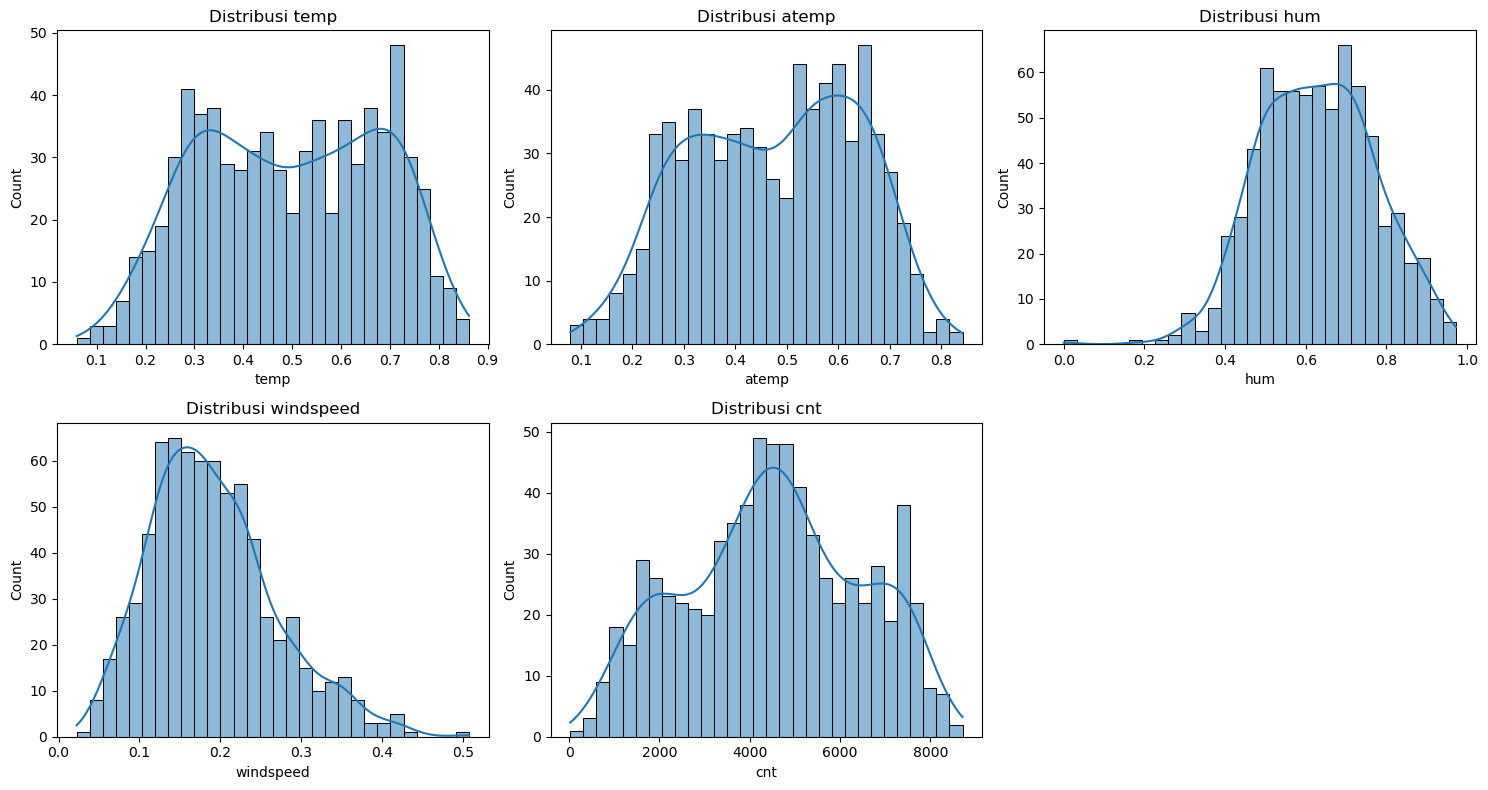

In [107]:
# VISUALIZATION & EXPLANATORY ANALYSIS

## Distribusi Data (Univariate Analysis)
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribusi variabel numerik di df_day
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_day[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

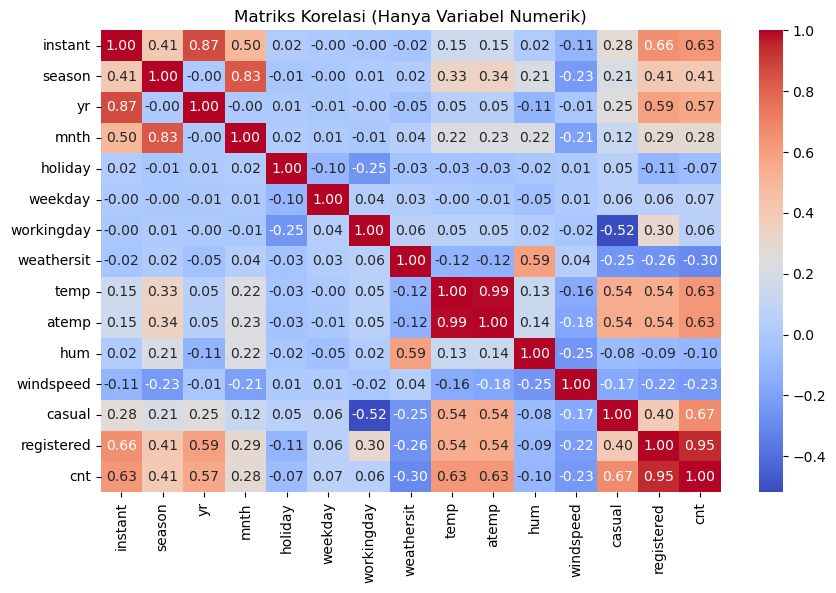

In [83]:
## Korelasi Antar Variabel (Multivariatet Analysis)

import numpy as np

# Pilih hanya kolom numerik
df_day_numeric = df_day.select_dtypes(include=[np.number])

# Plot heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(df_day_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi (Hanya Variabel Numerik)")
plt.show()

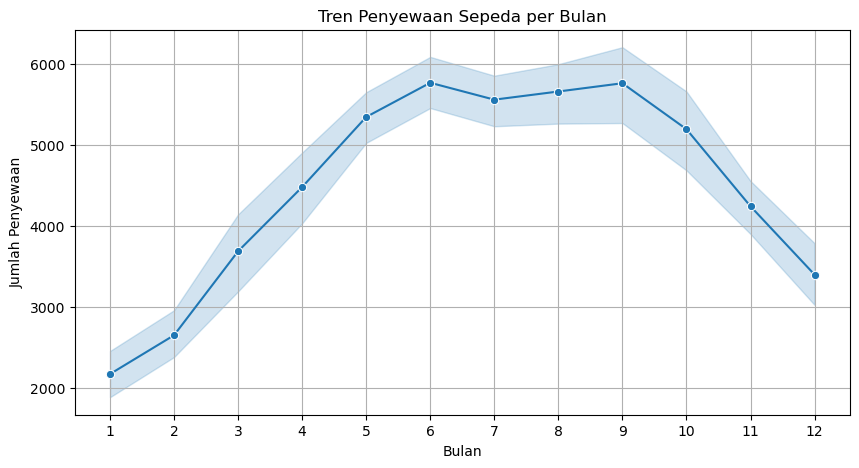

In [89]:
## TREN PENYEWAAN SEPEDA

# Tren Penyewaan Sepeda per Bulan (dteday diubah menjadi datetime sebelum mengambil bulannya)
# Konversi dteday ke tipe datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

# Ekstrak bulan
df_day['month'] = df_day['dteday'].dt.month

# Visualisasi tren penyewaan sepeda per bulan
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_day, x='month', y='cnt', marker="o")
plt.xticks(range(1, 13))  # Menampilkan angka bulan dengan benar (1-12)
plt.title("Tren Penyewaan Sepeda per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan")
plt.grid()
plt.show()

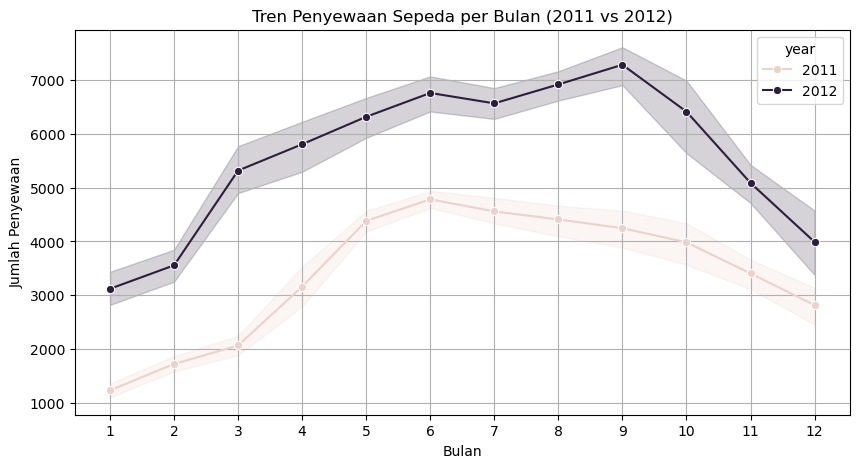

In [91]:
## Untuk melihat tren per bulan 2011 vs 2012

# Pastikan kolom dteday sudah dalam format datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

# Tambahkan kolom tahun & bulan
df_day['year'] = df_day['dteday'].dt.year
df_day['month'] = df_day['dteday'].dt.month

# Plot dengan hue berdasarkan tahun
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_day, x='month', y='cnt', hue='year', marker="o")

plt.xticks(range(1, 13))  # Menampilkan angka bulan dengan benar (1-12)
plt.title("Tren Penyewaan Sepeda per Bulan (2011 vs 2012)")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan")
plt.grid()
plt.show()

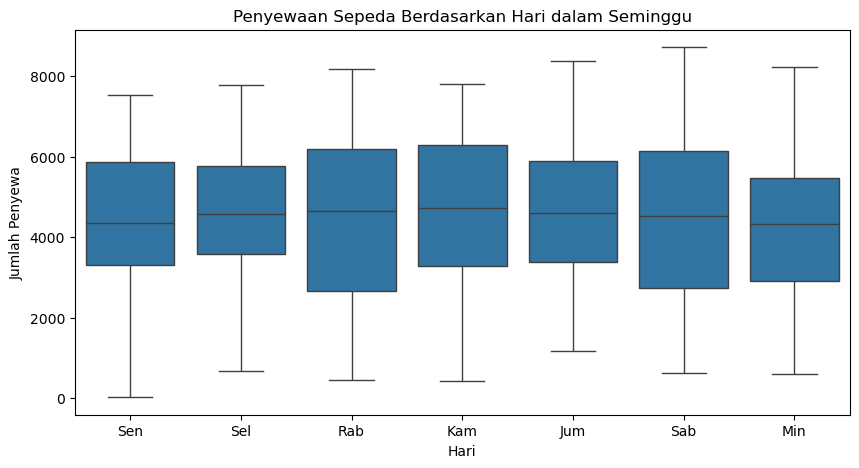

In [93]:
# Tren Penyewaan Sepeda per Hari dalam Seminggu

df_day['weekday'] = df_day['dteday'].dt.weekday  # 0 = Senin, 6 = Minggu

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_day, x='weekday', y='cnt')
plt.title('Penyewaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewa')
plt.xticks(ticks=range(7), labels=["Sen", "Sel", "Rab", "Kam", "Jum", "Sab", "Min"])
plt.show()

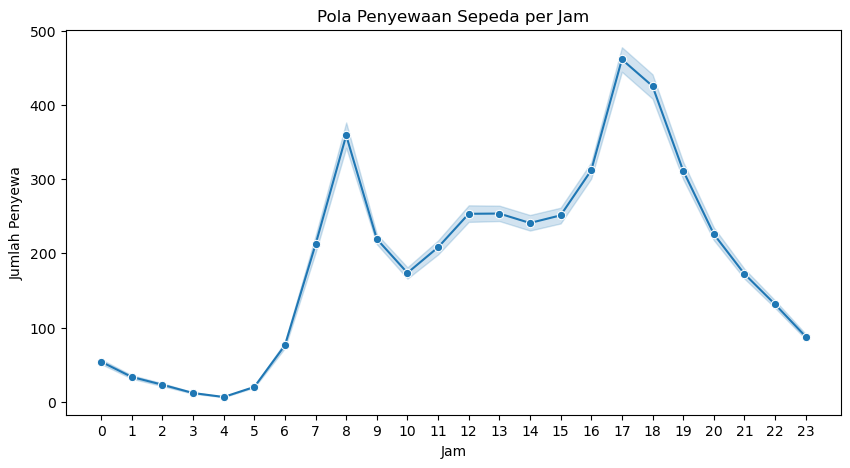

In [95]:
# Tren Penyewaan Sepeda per Jam (df_hour)

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_hour, x='hr', y='cnt', marker="o")
plt.title('Pola Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewa')
plt.xticks(range(0, 24))
plt.show()

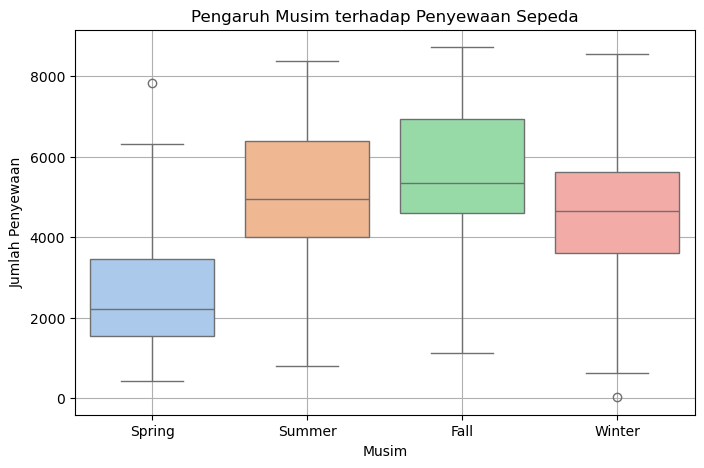

In [101]:
## PENGARUH CUACA TERHADAP PENYEWAAN 

# Pengaruh Musim terhadap Penyewaan
plt.figure(figsize=(8, 5))

sns.boxplot(data=df_day, x='season', y='cnt', hue='season', palette="pastel", dodge=False)

plt.xticks([0, 1, 2, 3], ["Spring", "Summer", "Fall", "Winter"])  # Ganti angka jadi label
plt.title("Pengaruh Musim terhadap Penyewaan Sepeda")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan")
plt.legend([],[], frameon=False)  # Hilangkan legend karena hue dan x sama
plt.grid()
plt.show()

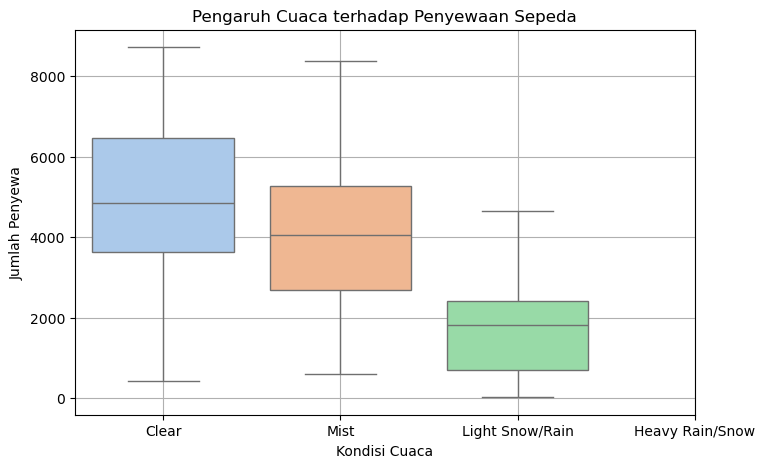

In [143]:
# Pengaruh Cuaca terhadap Penyewaan 

plt.figure(figsize=(8, 5))

sns.boxplot(data=df_day, x='weathersit', y='cnt', hue='weathersit', palette="pastel", dodge=False)

plt.xticks([0, 1, 2, 3], ["Clear", "Mist", "Light Snow/Rain", "Heavy Rain/Snow"])  # Ubah angka jadi label deskriptif
plt.title("Pengaruh Cuaca terhadap Penyewaan Sepeda")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewa")
plt.legend([],[], frameon=False)  # Hilangkan legend karena hue dan x sama
plt.grid()
plt.show()

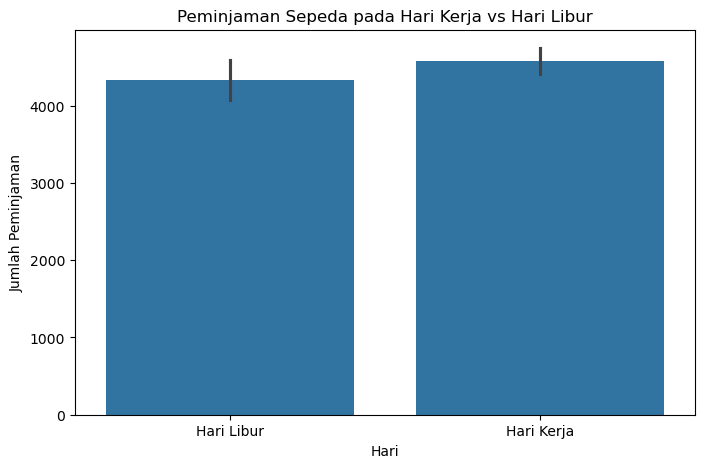

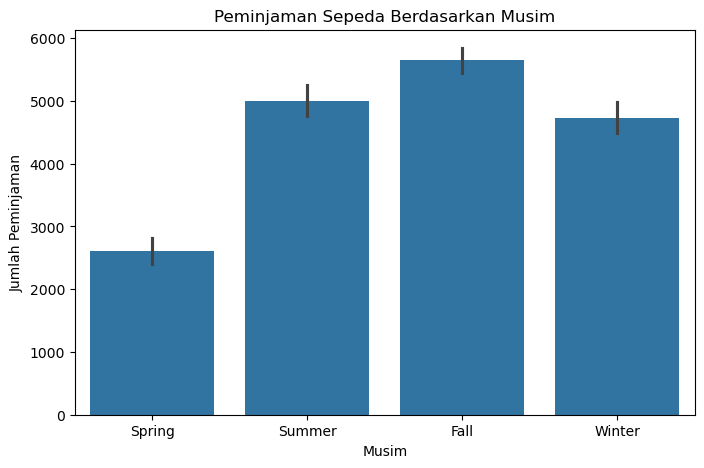

usage_category
High      440
Medium    181
Low        98
Name: count, dtype: int64


In [153]:
## ANALISIS LANJUTAN

# RFM Analysis (tidak ada data pelanggan individu)
# Geospatial Analysis (tidak memiliki data lokasi), alternatif menganalisis pola pinjaman sepeda berdasarkan hari kerja vs hari libur

import seaborn as sns

# Analisis peminjaman sepeda berdasarkan hari kerja vs libur
plt.figure(figsize=(8,5))
sns.barplot(data=df_day, x='workingday', y='cnt')
plt.xticks([0,1], ['Hari Libur', 'Hari Kerja'])
plt.xlabel('Hari')
plt.ylabel('Jumlah Peminjaman')
plt.title('Peminjaman Sepeda pada Hari Kerja vs Hari Libur')
plt.show()

# Clustering 

# Grouping berdasarkan musim
# Mapping season ke kategori nama
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_day['season_name'] = df_day['season'].map(season_map)
# Visualisasi
plt.figure(figsize=(8,5))
sns.barplot(data=df_day, x='season_name', y='cnt', order=['Spring', 'Summer', 'Fall', 'Winter'])
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.title('Peminjaman Sepeda Berdasarkan Musim')
plt.show()

# Binning jumlah sewa 
# Binning jumlah sewa ke dalam kategori rendah, sedang, tinggi
df_day['usage_category'] = pd.cut(df_day['cnt'], bins=[0, 2000, 4000, 8000], labels=['Low', 'Medium', 'High'])

# Cek distribusi kategori
print(df_day['usage_category'].value_counts())